# Udacity MLND Capstone Project
## "Determination of students’ interaction patterns with an intelligent tutoring system and study of their correlation with successful learning"
### Step 3 (comparison of learning rates between clusters)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time
from scipy import stats
from scipy.optimize import minimize

In [2]:
stud_learning = pd.read_csv('student_learning_final.csv')
stud_learning.drop(['Unnamed: 0'], axis=1, inplace=True)
cluster_index = pd.read_csv("cluster_index.csv", header=None)
stud_learning['cluster_index'] = cluster_index[1]
stud_learning['frac_incorrect_atts'] = stud_learning['number of incorrect attempts'] / stud_learning['number of attempts']
stud_learning.head()

,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,cluster_index,frac_incorrect_atts
0,0.172964,0.577597,303,146.0,1,0.481848
1,-0.011161,0.623980,295,187.0,5,0.633898
2,-0.084896,0.459276,529,269.0,6,0.508507
3,0.044947,0.459728,1286,556.0,2,0.432348
4,0.066242,0.486793,821,369.0,1,0.449452


In [3]:
stud_learning.columns

Index(['learning_parameter', 'difficulty_parameter', 'number of attempts',
       'number of incorrect attempts', 'cluster_index', 'frac_incorrect_atts'],
      dtype='object')

In [4]:
stud_data = pd.read_hdf('stud_data.hdf','test')
stud_data.head()

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts
0,89,9,79,303,213,0.518152,0.184818,0.286385,9577.000,3660.999,1.101266,3.835443
1,86,7,59,295,111,0.366102,0.071186,0.063063,10409.000,2570.000,1.610169,5.000000
2,181,10,150,529,180,0.491493,0.102079,0.077778,14850.000,2295.000,1.240000,3.526667
3,457,14,215,1288,687,0.566770,0.148292,0.066958,25290.001,7743.000,2.148837,5.990698
4,267,13,166,821,602,0.550548,0.068210,0.267442,20504.667,5347.334,1.660606,4.945783


In [5]:
stud_data = stud_data.join(stud_learning)
stud_data.head()

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,cluster_index,frac_incorrect_atts
0,89,9,79,303,213,0.518152,0.184818,0.286385,9577.000,3660.999,1.101266,3.835443,0.172964,0.577597,303,146.0,1,0.481848
1,86,7,59,295,111,0.366102,0.071186,0.063063,10409.000,2570.000,1.610169,5.000000,-0.011161,0.623980,295,187.0,5,0.633898
2,181,10,150,529,180,0.491493,0.102079,0.077778,14850.000,2295.000,1.240000,3.526667,-0.084896,0.459276,529,269.0,6,0.508507
3,457,14,215,1288,687,0.566770,0.148292,0.066958,25290.001,7743.000,2.148837,5.990698,0.044947,0.459728,1286,556.0,2,0.432348
4,267,13,166,821,602,0.550548,0.068210,0.267442,20504.667,5347.334,1.660606,4.945783,0.066242,0.486793,821,369.0,1,0.449452


Determine what clusters more successful in learning in terms of fraction of correct attempts:

In [6]:
stud_data_sum = stud_data.groupby('cluster_index').agg(np.sum).copy()
stud_data_sum['frac_incorrect_atts'] = stud_data_sum['number of incorrect attempts'] / stud_data_sum['number of attempts']
stud_data_sum

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,frac_incorrect_atts
cluster_index,,,,,,,,,,,,,,,,,
1,157381,9790,119787,463356,319334,746.328247,143.134751,320.395430,1.209619e+07,3310766.636,1700.710013,5073.330503,533.615744,590.950677,463202,197852.0,0.427140
2,22030,1535,17766,72336,33803,203.188547,91.172770,13.541033,1.645484e+06,459433.500,466.191313,1403.399037,426.118912,218.872902,71890,36290.0,0.504799
3,16010,1876,14923,33757,2842,646.793540,12.846483,2.963157,1.822630e+06,45694.000,1209.648207,3165.984896,2763.923125,546.419214,33752,12311.0,0.364749
4,36928,5409,32754,125483,52632,1256.070663,41.842531,26.817449,5.753900e+06,1572946.500,2775.185284,9999.657523,1684.809382,1333.332278,125470,63394.0,0.505252
5,121977,12125,108264,372790,134056,1088.841940,61.644813,46.097252,1.566643e+07,3317271.000,2253.456633,6800.545131,138.585166,891.014094,372649,171703.0,0.460763
6,329574,21053,265370,848789,258225,1112.744922,68.669698,62.199569,3.145390e+07,4868593.500,2292.982438,5939.409007,-11.449252,711.539726,847416,334224.0,0.394404


Interestingly, group 3 has the smallest fraction of incorrect attempts (~36.5%). Also, not surprisingly, `'frac_incorrect_atts'` in group 1 (with large `'frac_1s_hints'`) is significantly (`p-value = 1.75e-8`) smaller than in group 2 (with small `'frac_1s_hints'` and large `'frac_3s_atts'`):

In [7]:
arr1 = np.array(stud_data[stud_data['cluster_index'] == 1]['frac_incorrect_atts'])
arr2 = np.array(stud_data[stud_data['cluster_index'] == 2]['frac_incorrect_atts'])
arr1 = arr1[~np.isnan(arr1)]
arr2 = arr2[~np.isnan(arr2)]
stats.ttest_ind(arr1,arr2, equal_var = False)

Ttest_indResult(statistic=-5.729328888101044, pvalue=1.7528523291077249e-08)

However, the difference of `'frac_incorrect_atts'`  between students with "gaming" and non-gaming behaviour is **not significant** (`p-value = 0.83`):

In [8]:
arr_gam = np.array(stud_data[stud_data['cluster_index'] <= 2]['frac_incorrect_atts'])
arr_nongam = np.array(stud_data[stud_data['cluster_index'] > 2]['frac_incorrect_atts'])
arr_gam = arr_gam[~np.isnan(arr_gam)]
arr_nongam = arr_nongam[~np.isnan(arr_nongam)]
stats.ttest_ind(arr_gam,arr_nongam, equal_var = False)

Ttest_indResult(statistic=0.20874210756084033, pvalue=0.83466558756318543)

Notably, group 5 (students with medium `'num_sess'` and `'num_probs'`) has **significantly smaller** `'frac_incorrect_atts'` than group 4 (students with small `'num_sess'` and `'num_probs'`) but **significantly smaller** `'frac_incorrect_atts'` than in group 6 (students with large `'num_sess'` and `'num_probs'`):

In [9]:
arr4 = np.array(stud_data[stud_data['cluster_index'] == 4]['frac_incorrect_atts'])
arr5 = np.array(stud_data[stud_data['cluster_index'] == 5]['frac_incorrect_atts'])
arr6 = np.array(stud_data[stud_data['cluster_index'] == 6]['frac_incorrect_atts'])
arr4 = arr4[~np.isnan(arr4)]
arr5 = arr5[~np.isnan(arr5)]
arr6 = arr6[~np.isnan(arr6)]
print(stats.ttest_ind(arr5,arr4, equal_var = False))
print(stats.ttest_ind(arr6,arr5, equal_var = False))

Ttest_indResult(statistic=-10.153852159747615, pvalue=5.9895165350814053e-24)
Ttest_indResult(statistic=-16.552377685289887, pvalue=1.8740538669177719e-59)


In other words, for students with non-gaming behaviour `'frac_incorrect_atts'` **steadily decreases with learning experience**.

Other differences between groups:

In [10]:
stud_data_mean = stud_data.groupby('cluster_index').agg(np.mean).copy()
stud_data_mean

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,frac_incorrect_atts
cluster_index,,,,,,,,,,,,,,,,,
1,121.623648,7.565688,92.571097,358.080371,246.780526,0.576761,0.110614,0.247601,9347.902114,2558.552269,1.314304,3.920657,0.412377,0.456685,357.961360,152.899536,0.421592
2,56.342711,3.925831,45.437340,185.002558,86.452685,0.519664,0.233178,0.034632,4208.397711,1175.021739,1.192305,3.589256,1.089818,0.559777,183.861893,92.813299,0.479562
3,14.436429,1.691614,13.456267,30.439134,2.562669,0.583222,0.011584,0.002672,1643.489630,41.202885,1.090756,2.854811,2.492266,0.492713,30.434626,11.100992,0.402156
4,15.246903,2.233278,13.523534,51.809661,21.730801,0.518609,0.017276,0.011072,2375.681462,649.441164,1.145824,4.128678,0.695627,0.550509,51.804294,26.174236,0.479627
5,62.648690,6.227530,55.605547,191.468927,68.852594,0.559241,0.031661,0.023676,8046.446327,1703.785824,1.157399,3.492833,0.071179,0.457634,191.396507,88.188495,0.440491
6,181.383599,11.586681,146.048431,467.137589,142.116125,0.612408,0.037793,0.034232,17310.899564,2679.468079,1.261961,3.268800,-0.006301,0.391601,466.381948,183.942763,0.386384


There is a significant increase of `'frac_3s_atts'` for groups 4-5-6:

In [11]:
arr4 = np.array(stud_data[stud_data['cluster_index'] == 4]['frac_3s_atts'])
arr5 = np.array(stud_data[stud_data['cluster_index'] == 5]['frac_3s_atts'])
arr6 = np.array(stud_data[stud_data['cluster_index'] == 6]['frac_3s_atts'])
arr4 = arr4[~np.isnan(arr4)]
arr5 = arr5[~np.isnan(arr5)]
arr6 = arr6[~np.isnan(arr6)]
print(stats.ttest_ind(arr5,arr4, equal_var = False))
print(stats.ttest_ind(arr6,arr5, equal_var = False))

Ttest_indResult(statistic=16.462911716329312, pvalue=5.0996180356250809e-59)
Ttest_indResult(statistic=6.2931050213512316, pvalue=3.4739480257167589e-10)


, a significant increase of 'frac_1s_hints' for groups 4-5-6:

In [12]:
arr4 = np.array(stud_data[stud_data['cluster_index'] == 4]['frac_1s_hints'])
arr5 = np.array(stud_data[stud_data['cluster_index'] == 5]['frac_1s_hints'])
arr6 = np.array(stud_data[stud_data['cluster_index'] == 6]['frac_1s_hints'])
arr4 = arr4[~np.isnan(arr4)]
arr5 = arr5[~np.isnan(arr5)]
arr6 = arr6[~np.isnan(arr6)]
print(stats.ttest_ind(arr5,arr4, equal_var = False))
print(stats.ttest_ind(arr6,arr5, equal_var = False))

Ttest_indResult(statistic=13.252648797032892, pvalue=3.4429894092371465e-39)
Ttest_indResult(statistic=9.0112499269936261, pvalue=3.2062949164427214e-19)


, and a significant decrease of 'max_atts' for groups 4-5-6:

In [13]:
arr4 = np.array(stud_data[stud_data['cluster_index'] == 4]['max_atts'])
arr5 = np.array(stud_data[stud_data['cluster_index'] == 5]['max_atts'])
arr6 = np.array(stud_data[stud_data['cluster_index'] == 6]['max_atts'])
arr4 = arr4[~np.isnan(arr4)]
arr5 = arr5[~np.isnan(arr5)]
arr6 = arr6[~np.isnan(arr6)]
print(stats.ttest_ind(arr5,arr4, equal_var = False))
print(stats.ttest_ind(arr6,arr5, equal_var = False))

Ttest_indResult(statistic=-11.66474597325503, pvalue=6.3441131333456629e-31)
Ttest_indResult(statistic=-5.813163173033753, pvalue=6.640246772802727e-09)


Increase of `max_probl_views` is significant between groups 5 and 6:

In [14]:
arr4 = np.array(stud_data[stud_data['cluster_index'] == 4]['max_probl_views'])
arr5 = np.array(stud_data[stud_data['cluster_index'] == 5]['max_probl_views'])
arr6 = np.array(stud_data[stud_data['cluster_index'] == 6]['max_probl_views'])
arr4 = arr4[~np.isnan(arr4)]
arr5 = arr5[~np.isnan(arr5)]
arr6 = arr6[~np.isnan(arr6)]
print(stats.ttest_ind(arr5,arr4, equal_var = False))
print(stats.ttest_ind(arr6,arr5, equal_var = False))

Ttest_indResult(statistic=1.625027093046111, pvalue=0.1042377703597938)
Ttest_indResult(statistic=15.833103986243177, pvalue=1.9284145705097942e-54)


As we see, increasing "experience" (in group sequence 4-5-6) also leads to:
- increase of "gaming" fractions `'frac_3s_atts'` and `'frac_1s_hints'`;
- increase of `'max_probl_views'` (so the problems are viewed in more details);
- decrease of `'max_atts'` (so there are smaller attempts per problem).

# Calculate mean leaning parameter and its dispersion for each group:

Because learning parameter is determined from the fit of the learning curve, it is essential to analyse learning curves starting with some reasonable minimum number of attempts.

As we see, there is a very large spread in learning parameters: between -9.97 and 24.9:

In [15]:
stud_data['learning_parameter'].describe()

count    8980.000000
mean        0.616437
std         3.188777
min        -9.965780
25%        -0.054653
50%         0.063602
75%         0.218565
max        24.908305
Name: learning_parameter, dtype: float64

Moreover, for ~1/3 of students learning parameter is **negative**:

In [16]:
stud_data[stud_data['learning_parameter'] < 0].shape[0]

3179

What best describes "negative learners"? First, look on extreme examples. Take "extreme negative learners" (students with learning rate < -0.5, and compare them with "extreme positive learnens" (students with learning rate > 0.5):

In [17]:
stud_data[stud_data['learning_parameter'] < -0.5].describe()

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,cluster_index,frac_incorrect_atts
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,34.708075,2.720497,32.254658,51.360248,14.006211,0.688847,0.025639,0.050475,3113.850932,371.161491,1.092419,2.245839,-1.227948,0.161278,51.291925,11.478261,3.509317,0.310729
std,56.546180,2.928761,51.954220,78.542310,26.625058,0.171281,0.055839,0.151386,5421.411714,472.810955,0.224871,1.444326,1.702650,0.099337,78.469551,16.197256,1.275333,0.171545
min,1.000000,1.000000,1.000000,2.000000,0.000000,0.200000,0.000000,0.000000,26.000000,0.000000,1.000000,1.000000,-9.965780,0.001000,2.000000,1.000000,1.000000,0.024793
25%,5.000000,1.000000,5.000000,10.000000,2.000000,0.588235,0.000000,0.000000,546.000000,46.000000,1.000000,1.441860,-1.112757,0.102926,10.000000,3.000000,3.000000,0.181818
50%,11.000000,1.000000,11.000000,21.000000,5.000000,0.727273,0.000000,0.000000,961.000000,172.000000,1.000000,1.705882,-0.759733,0.154174,21.000000,5.000000,4.000000,0.272727
75%,35.000000,3.000000,35.000000,53.000000,13.000000,0.814286,0.022222,0.000000,2215.000000,487.000000,1.093023,2.411765,-0.594690,0.211333,53.000000,13.000000,4.000000,0.411765
max,397.000000,13.000000,362.000000,588.000000,184.000000,0.975207,0.333333,1.000000,41457.000000,2319.000000,2.600000,11.000000,-0.503115,0.529482,588.000000,136.000000,6.000000,0.800000


In [18]:
stud_data[stud_data['learning_parameter'] >= 0.5].describe()

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,cluster_index,frac_incorrect_atts
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1080.000000
mean,9.767442,1.384615,9.294275,20.773703,9.701252,0.658382,0.040541,0.031332,975.757603,238.600179,1.078327,2.370444,4.841834,0.523349,20.770125,6.887299,3.181574,0.318386
std,13.127075,0.965203,12.326656,28.717120,28.702815,0.254652,0.118064,0.109242,1235.419496,402.316758,0.271104,1.544594,7.776401,0.346560,28.710326,10.527272,0.927130,0.226612
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.001000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,5.000000,1.000000,0.541964,0.000000,0.000000,185.750000,9.000000,1.000000,1.200000,0.533341,0.252888,5.000000,1.000000,3.000000,0.166667
50%,6.000000,1.000000,5.000000,12.000000,3.000000,0.666667,0.000000,0.000000,644.500000,94.500000,1.000000,2.000000,0.793611,0.520733,12.000000,3.000000,3.000000,0.315789
75%,11.000000,1.000000,11.000000,25.000000,9.000000,0.833333,0.000000,0.000000,1199.000000,311.000000,1.026931,3.000000,1.853239,0.749445,25.000000,9.000000,4.000000,0.444444
max,121.000000,12.000000,116.000000,332.000000,661.000000,1.000000,1.000000,1.000000,10044.000000,6247.000000,5.000000,12.000000,24.908305,1.669793,332.000000,121.000000,6.000000,1.000000


As we see, "extreme negative learners" are very similar to "extreme positive learners" in terms of `'frac_corr_atts'`. However, they opened much more sessions (`'num_sess'`), tried to solve more problems (`'num_probs'`), made more attempts to solve the problems (`'num_atts'`) and spent more time (`time_atts`) for solving them.

In [19]:
stud_data[stud_data['learning_parameter'] < -0.5].groupby('cluster_index').agg(len)['num_sess']

cluster_index
1    20
3    57
4    58
5    14
6    12
Name: num_sess, dtype: int64

In [20]:
stud_data[stud_data['learning_parameter'] >= 0.5].groupby('cluster_index').agg(len)['num_sess']

cluster_index
1     88
2     93
3    501
4    404
5     28
6      4
Name: num_sess, dtype: int64

Notably, most of "extreme learners" belong to groups 3 and 4 that have the smallest `'num_atts'`:

In [21]:
stud_data.groupby('cluster_index').agg(np.mean)

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,frac_incorrect_atts
cluster_index,,,,,,,,,,,,,,,,,
1,121.623648,7.565688,92.571097,358.080371,246.780526,0.576761,0.110614,0.247601,9347.902114,2558.552269,1.314304,3.920657,0.412377,0.456685,357.961360,152.899536,0.421592
2,56.342711,3.925831,45.437340,185.002558,86.452685,0.519664,0.233178,0.034632,4208.397711,1175.021739,1.192305,3.589256,1.089818,0.559777,183.861893,92.813299,0.479562
3,14.436429,1.691614,13.456267,30.439134,2.562669,0.583222,0.011584,0.002672,1643.489630,41.202885,1.090756,2.854811,2.492266,0.492713,30.434626,11.100992,0.402156
4,15.246903,2.233278,13.523534,51.809661,21.730801,0.518609,0.017276,0.011072,2375.681462,649.441164,1.145824,4.128678,0.695627,0.550509,51.804294,26.174236,0.479627
5,62.648690,6.227530,55.605547,191.468927,68.852594,0.559241,0.031661,0.023676,8046.446327,1703.785824,1.157399,3.492833,0.071179,0.457634,191.396507,88.188495,0.440491
6,181.383599,11.586681,146.048431,467.137589,142.116125,0.612408,0.037793,0.034232,17310.899564,2679.468079,1.261961,3.268800,-0.006301,0.391601,466.381948,183.942763,0.386384


Together with the smallest group 2, groups 3 and 4 also correspond to the largest `'learning_parameter'` variation across their members:

In [22]:
stud_data.groupby('cluster_index').agg(np.std)['learning_parameter']

cluster_index
1    2.575010
2    4.092726
3    6.263133
4    3.261689
5    0.904354
6    0.151328
Name: learning_parameter, dtype: float64

Note that **both** absolute average value and standard deviation come to zero with increasing `'num_atts'`: a possible manifestation of the [Plateau effect](https://en.wikipedia.org/wiki/Plateau_effect).

Finally, I try to explain the observed **increase** of `'frac_incorrect_atts'` for 5 and more attempts.

The group with the largest `'frac_incorrect_atts'` is **group 4** that also has the largest `'max_atts'` (number of maximal attempts averaged for all assessed problems). Consequently, students from two groups with the smallest `'frac_incorrect_atts'` (**groups 3 and 6**) also have the smallest `'max_atts'`:

In [23]:
stud_data.groupby('cluster_index').agg(np.mean)[['frac_incorrect_atts', 'max_atts']].corr()

,frac_incorrect_atts,max_atts
frac_incorrect_atts,1.000000,0.660316
max_atts,0.660316,1.000000


In [24]:
stud_data.corr()['frac_incorrect_atts']['max_atts']

0.51717864000939062

As a result, students from groups 3 and 6 contribute less (and students from group 4 contribute more) to problems with large number of attempts and **distort** the averaged learning curve towards larger `'frac_incorrect_atts'`.

# Comparison with "benchmark" model (student with "gaming" vs "non-gaming" behaviour):

In [25]:
stud_data['gaming_index'] = stud_data['cluster_index'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6:1})

In [26]:
stud_data.groupby('gaming_index').agg(np.mean)

,num_sess,num_days,num_probs,num_atts,num_hints,frac_corr_atts,frac_3s_atts,frac_1s_hints,time_atts,time_hints,max_probl_views,max_atts,learning_parameter,difficulty_parameter,number of attempts,number of incorrect attempts,cluster_index,frac_incorrect_atts
gaming_index,,,,,,,,,,,,,,,,,,
0,106.475371,6.721068,81.633828,317.918101,209.576855,0.563511,0.139055,0.198182,8155.293081,2237.507499,1.285995,3.843756,0.569575,0.480607,317.562018,138.956677,1.232047,0.435068
1,69.155449,5.546676,57.753393,189.282934,61.378341,0.562639,0.025360,0.018928,7497.856889,1344.003427,1.169468,3.551144,0.627261,0.477355,189.072927,79.730226,4.613023,0.434249


# Creating visualisation:

In [27]:
data = pd.read_hdf('data.hdf','test')
data.head()

,Anon Student Id,Session Id,Duration (sec),Student Response Type,Problem Name,Problem View,Attempt At Step,Outcome,Day,x
0,Stu_001d187b1b375fe98b88696b250177f0,647501,102.0,1,2218,1.0,1.0,2.0,2004-11-10,0
1,Stu_001d187b1b375fe98b88696b250177f0,647501,46.0,0,2218,1.0,2.0,0.0,2004-11-10,1
2,Stu_001d187b1b375fe98b88696b250177f0,647792,70.0,1,3093,1.0,1.0,2.0,2004-11-10,0
3,Stu_001d187b1b375fe98b88696b250177f0,647792,22.0,1,3093,1.0,1.0,2.0,2004-11-10,0
4,Stu_001d187b1b375fe98b88696b250177f0,647792,2.0,1,3093,1.0,2.0,2.0,2004-11-10,0


In [28]:
stud_list = data['Anon Student Id'].unique()
#print(stud_list[:5])
stud_dict = {stud: cluster_index.loc[i, 1] for i, stud in enumerate(stud_list)}

In [29]:
stud_list[0]

'Stu_001d187b1b375fe98b88696b250177f0'

In [30]:
cluster_index.loc[0, 1]

1

In [31]:
stud_dict['Stu_001d187b1b375fe98b88696b250177f0']

1

In [32]:
stud_df = pd.DataFrame()
for item in stud_dict:
    #print(item, stud_dict[item])
    stud_df.loc[item, 'cluster_index'] = int(stud_dict[item])
stud_df.head()

,cluster_index
Stu_001d187b1b375fe98b88696b250177f0,1.0
Stu_00b8a37b3ab49bfe7d7a77014d1e4cf8,5.0
Stu_00c6652f296f103913139157c79a856f,6.0
Stu_01080cce4b1a14b3fd81d684421daed4,2.0
Stu_0153c9b08d68e42d9a2bb5f70086df00,1.0


In [33]:
data_125 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 1].index)) | \
               (data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 2].index)) | \
               (data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 5].index))]
data_125.head()

,Anon Student Id,Session Id,Duration (sec),Student Response Type,Problem Name,Problem View,Attempt At Step,Outcome,Day,x
0,Stu_001d187b1b375fe98b88696b250177f0,647501,102.0,1,2218,1.0,1.0,2.0,2004-11-10,0
1,Stu_001d187b1b375fe98b88696b250177f0,647501,46.0,0,2218,1.0,2.0,0.0,2004-11-10,1
2,Stu_001d187b1b375fe98b88696b250177f0,647792,70.0,1,3093,1.0,1.0,2.0,2004-11-10,0
3,Stu_001d187b1b375fe98b88696b250177f0,647792,22.0,1,3093,1.0,1.0,2.0,2004-11-10,0
4,Stu_001d187b1b375fe98b88696b250177f0,647792,2.0,1,3093,1.0,2.0,2.0,2004-11-10,0


In [34]:
data_2 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 2].index))]

In [35]:
s1 = data[data['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2 = data[data['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1[8] = s1.loc[8:].sum()
for i in range(9, int(s1.index.max()+1)):
    try:
        s1.drop(i, inplace=True)
    except ValueError:
        pass

s2[8] = s2.loc[8:].sum()
for i in range(9, int(s2.index.max()+1)):
    try:
        s2.drop(i, inplace=True)
    except ValueError:
        pass

In [36]:
data_1 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 1].index))]
data_2 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 2].index))]
data_3 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 3].index))]
data_4 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 4].index))]
data_5 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 5].index))]
data_6 = data[(data['Anon Student Id'].isin(stud_df[stud_df['cluster_index'] == 6].index))]

s1_1 = data_1[data_1['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2_1 = data_1[data_1['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1_1[8] = s1_1.loc[8:].sum()
for i in range(9, int(s1_1.index.max()+1)):
    try:
        s1_1.drop(i, inplace=True)
    except ValueError:
        pass

s2_1[8] = s2_1.loc[8:].sum()
for i in range(9, int(s2_1.index.max()+1)):
    try:
        s2_1.drop(i, inplace=True)
    except ValueError:
        pass
    
s1_2 = data_2[data_2['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2_2 = data_2[data_2['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1_2[8] = s1_2.loc[8:].sum()
for i in range(9, int(s1_2.index.max()+1)):
    try:
        s1_2.drop(i, inplace=True)
    except ValueError:
        pass

s2_2[8] = s2_2.loc[8:].sum()
for i in range(9, int(s2_2.index.max()+1)):
    try:
        s2_2.drop(i, inplace=True)
    except ValueError:
        pass
    
s1_3 = data_3[data_3['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2_3 = data_3[data_3['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1_3[8] = s1_3.loc[8:].sum()
for i in range(9, int(s1_3.index.max()+1)):
    try:
        s1_3.drop(i, inplace=True)
    except ValueError:
        pass

s2_3[8] = s2_3.loc[8:].sum()
for i in range(9, int(s2_3.index.max()+1)):
    try:
        s2_3.drop(i, inplace=True)
    except ValueError:
        pass

s1_4 = data_4[data_4['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2_4 = data_4[data_4['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1_4[8] = s1_4.loc[8:].sum()
for i in range(9, int(s1_4.index.max()+1)):
    try:
        s1_4.drop(i, inplace=True)
    except ValueError:
        pass

s2_4[8] = s2_4.loc[8:].sum()
for i in range(9, int(s2_4.index.max()+1)):
    try:
        s2_4.drop(i, inplace=True)
    except ValueError:
        pass

s1_5 = data_5[data_5['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2_5 = data_5[data_5['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1_5[8] = s1_5.loc[8:].sum()
for i in range(9, int(s1_5.index.max()+1)):
    try:
        s1_5.drop(i, inplace=True)
    except ValueError:
        pass

s2_5[8] = s2_5.loc[8:].sum()
for i in range(9, int(s2_5.index.max()+1)):
    try:
        s2_5.drop(i, inplace=True)
    except ValueError:
        pass
    
s1_6 = data_6[data_6['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2_6 = data_6[data_6['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1_6[8] = s1_6.loc[8:].sum()
for i in range(9, int(s1_6.index.max()+1)):
    try:
        s1_6.drop(i, inplace=True)
    except ValueError:
        pass

s2_6[8] = s2_6.loc[8:].sum()
for i in range(9, int(s2_6.index.max()+1)):
    try:
        s2_6.drop(i, inplace=True)
    except ValueError:
        pass

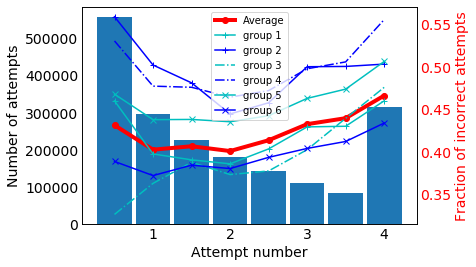

In [37]:
fig, ax1 = plt.subplots()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8.3
fig_size[1] = 4.7
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(0.5,8.5)
plt.bar(s1.index, s1, width=0.9)
#plt.bar(s2.index, s2, width=0.9)
#plt.legend(['CORRECT', 'INCORRECT'])

plt.xlabel("Attempt number", size=14)
plt.ylabel("Number of attempts", size=14)
ax1.tick_params(axis ='both', which='major', length=0, labelsize =14, color='black')
ax1.tick_params(axis ='both', which='minor', length=0)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
#labels = ['2', '4', '6', '8+']
#print(labels)

ax2 = ax1.twinx()
ax2.plot(s1.index, s2/s1, 'r-o', linewidth=4, label='Average')
ax2.plot(s1_1.index, s2_1/s1_1, 'c-+', label='group 1')
ax2.plot(s1_2.index, s2_2/s1_2, 'b-+', label='group 2')
ax2.plot(s1_3.index, s2_3/s1_3, 'c-.', label='group 3')
ax2.plot(s1_4.index, s2_4/s1_4, 'b-.', label='group 4')
ax2.plot(s1_5.index, s2_5/s1_5, 'c-x', label='group 5')
ax2.plot(s1_6.index, s2_6/s1_6, 'b-x', label='group 6')
ax2.legend()

ax2.set_ylabel('Fraction of incorrect attempts', size=14, color='r')
ax2.tick_params('y', colors='r')
ax2.tick_params(axis ='both', which='minor', length=0)
ax2.tick_params(axis ='both', which='major', length=0, labelsize =14, color='red')

ax1.set_xticklabels(labels)

plt.show()